In [2]:
import colorsys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
def ShowImage(img, name):
    fig, axes = plt.subplots(1)
    axes.imshow(img)
    axes.set_title(name)
    axes.axis("off")    
    fig.set_figwidth(10)    
    fig.set_figheight(10)  
    plt.show()

def PrintHist(imageArray, text):
    x = range(0,256)
    y = np.zeros(256, dtype = int)
    plt.figure(figsize=[6,6])

    for i in imageArray[:,:,0].flat:
      y[i] += 1
      
    plt.bar(x, y)
    plt.title(text)
    plt.ylabel("Кол-во пикселей")
    plt.xlabel("Уровень яркости")
    plt.xlim([-1, 256])
    plt.show()

def log_p(img):
    c=int(255/(np.log1p(1+np.max(img))))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for p in range(len(img[i][j])):
                img[i][j][p] = c * np.log1p(1+img[i][j][p])

def deg(img, pow, c = 1):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for p in range(len(img[i][j])):
                img[i][j][p] = 255 * (img[i][j][p]/255) **pow

07.jpg


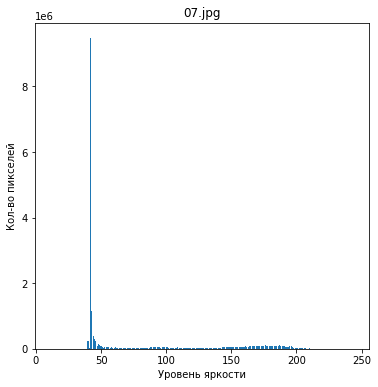

0-300


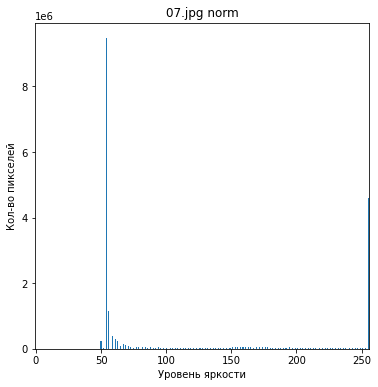

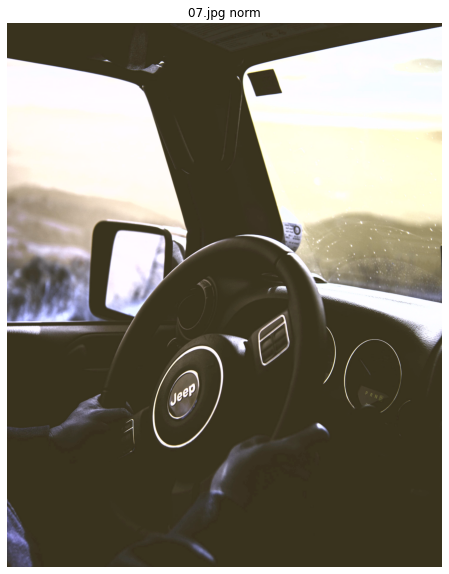

03.jpg


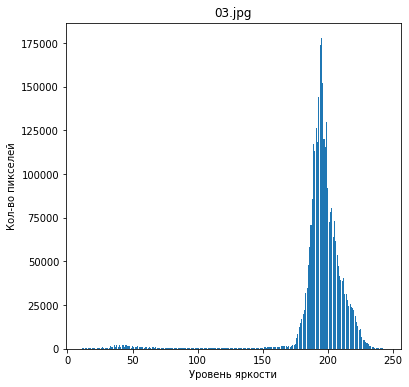

-100-255


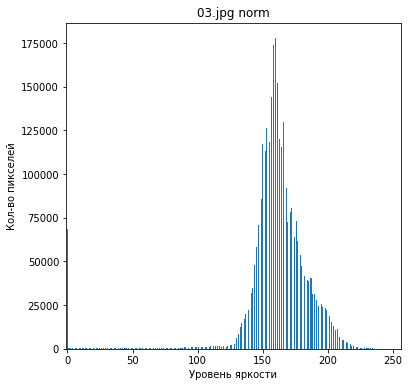

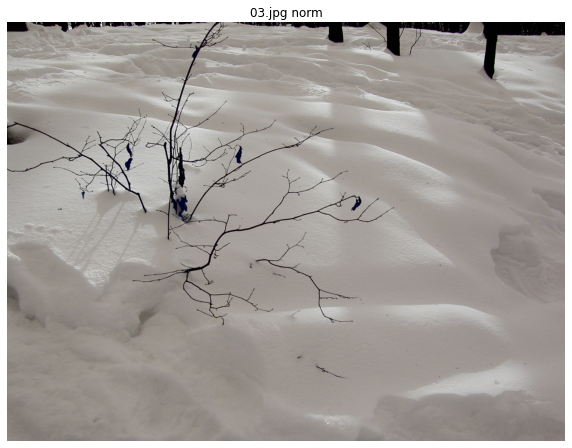

10.jpg


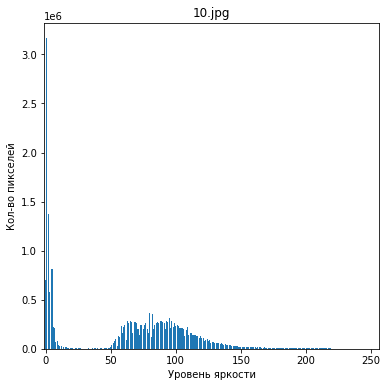

0-300


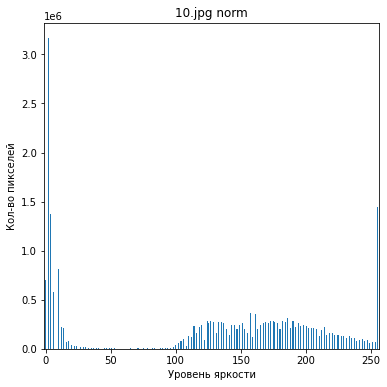

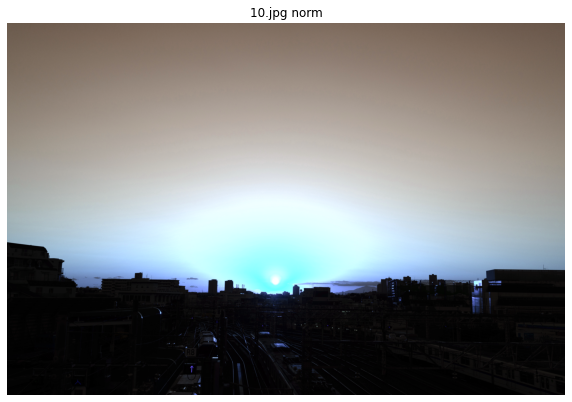

02.tif


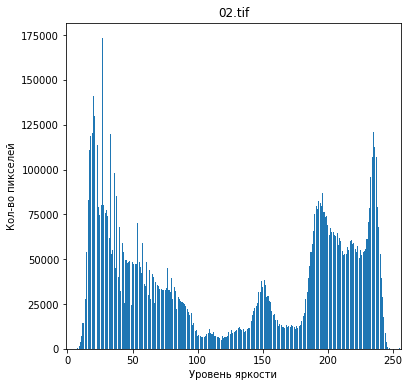

-100-255


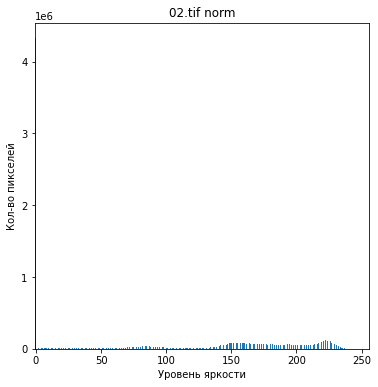

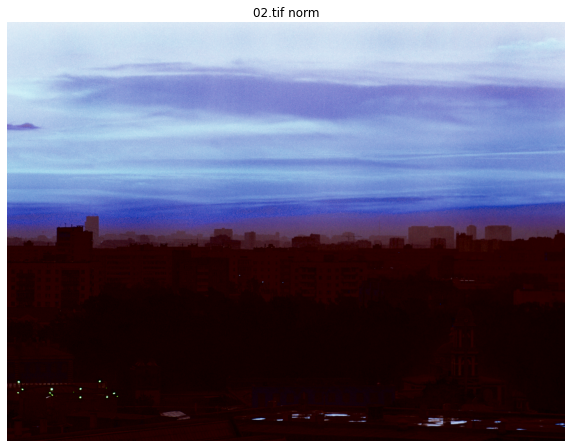

09.jpg


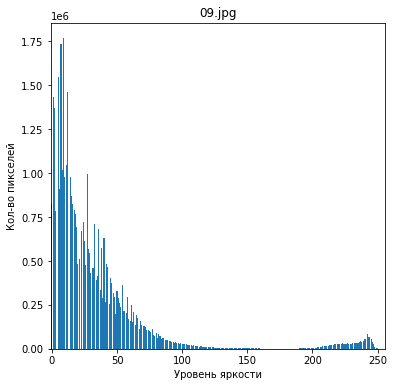

0-300


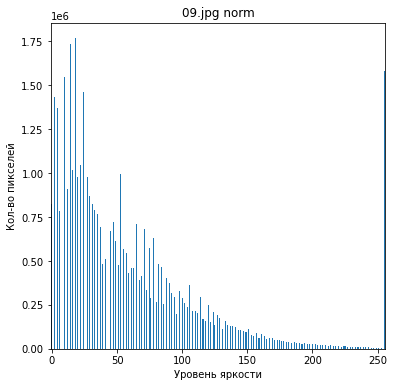

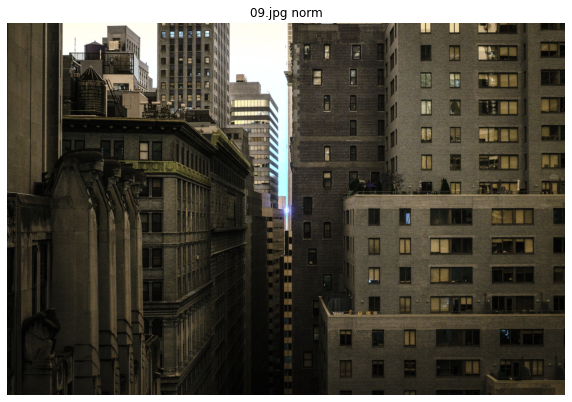

28.jpg


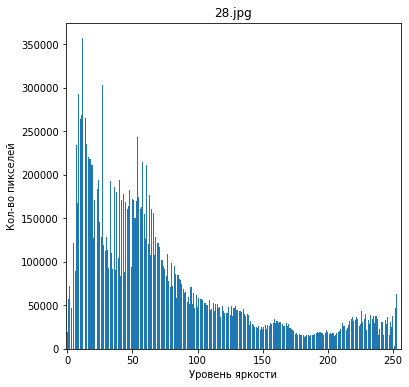

0-300


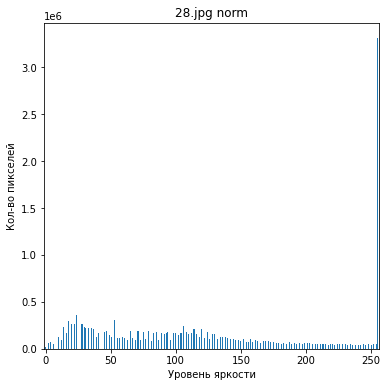

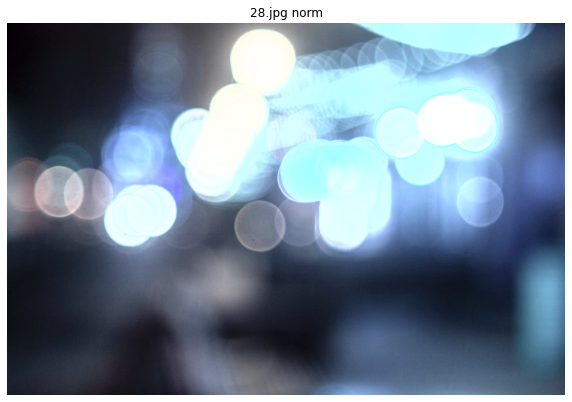

08.jpg


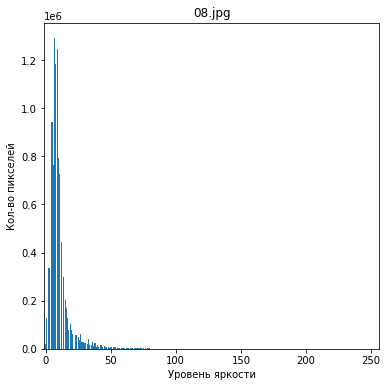

0-300


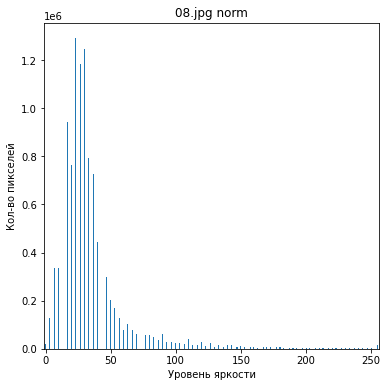

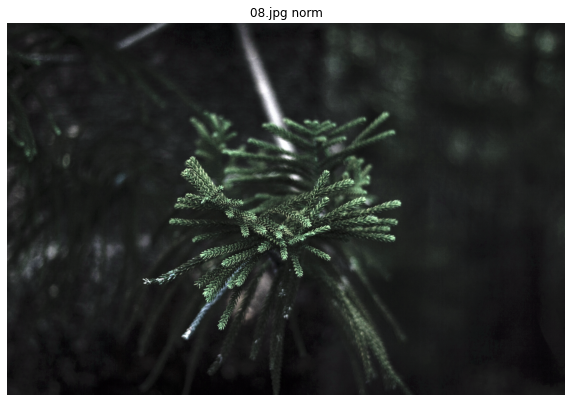

01.tif


0-300


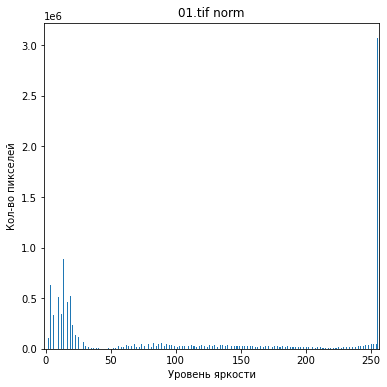

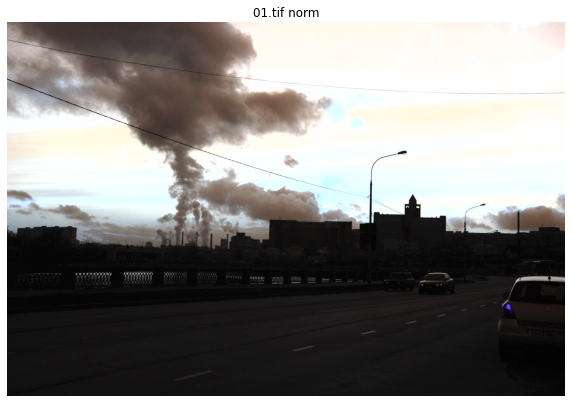

04.jpg


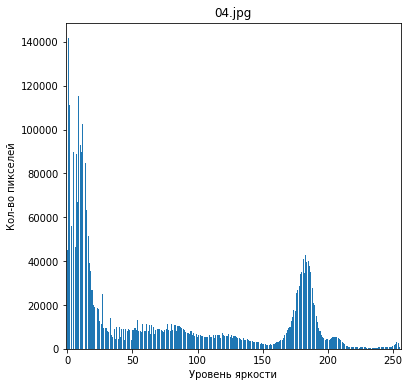

0-300


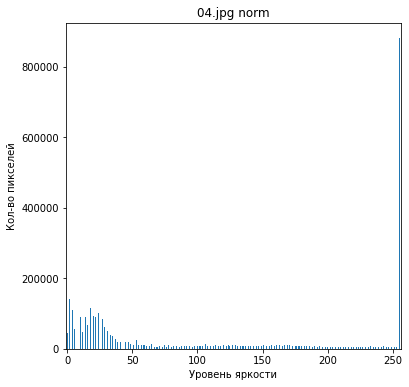

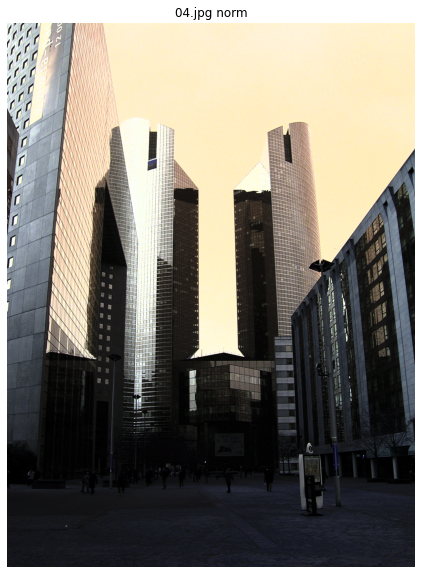

26.jpg


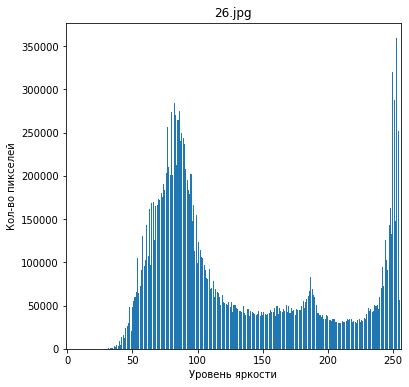

0-300


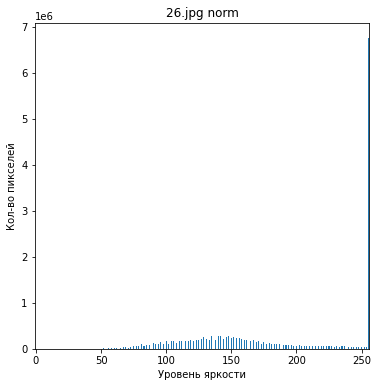

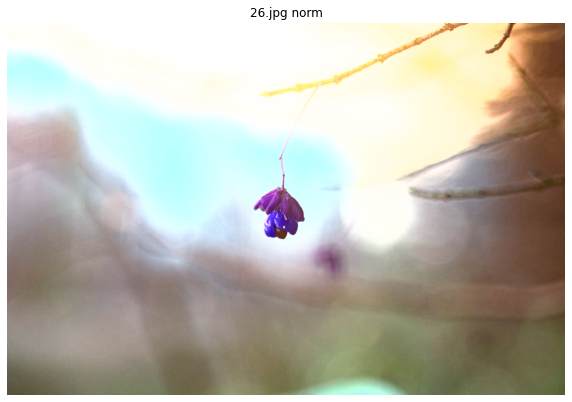

06.jpg


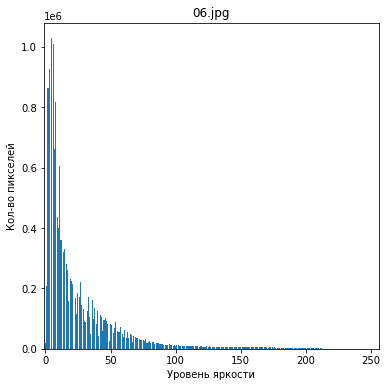

0-300


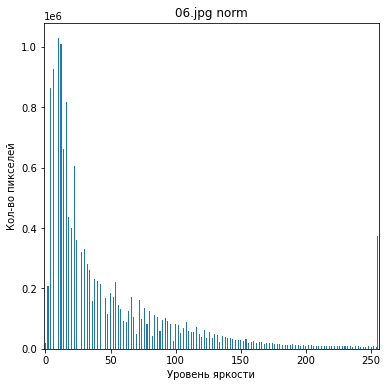

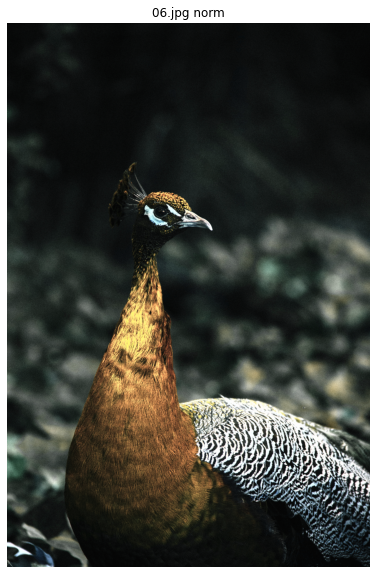

11.jpg


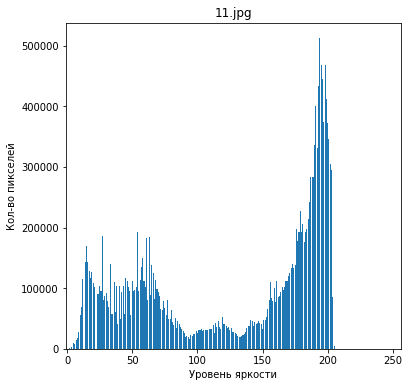

-100-255


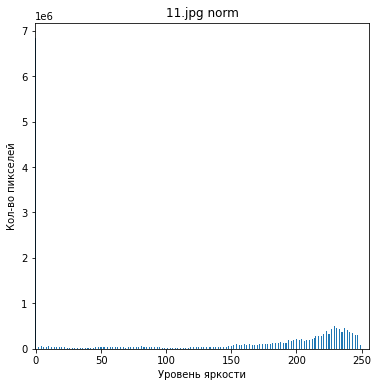

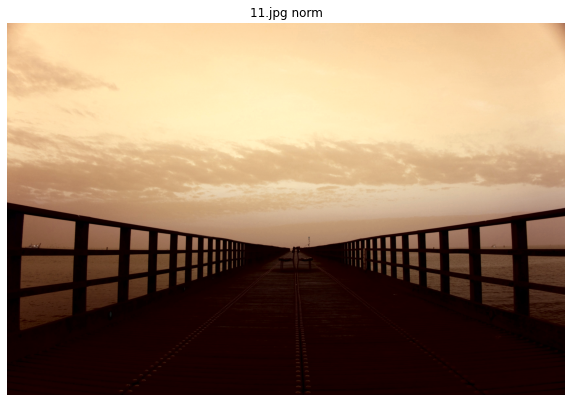

13.jpg


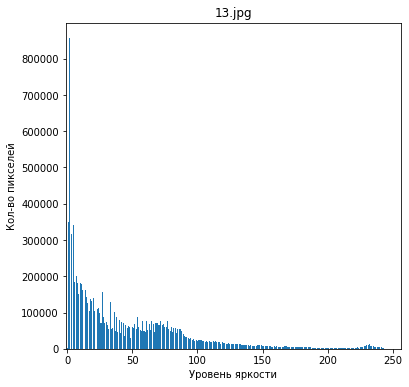

0-300


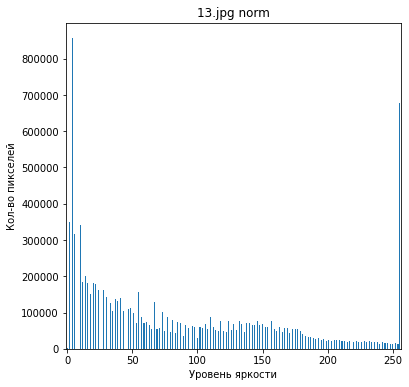

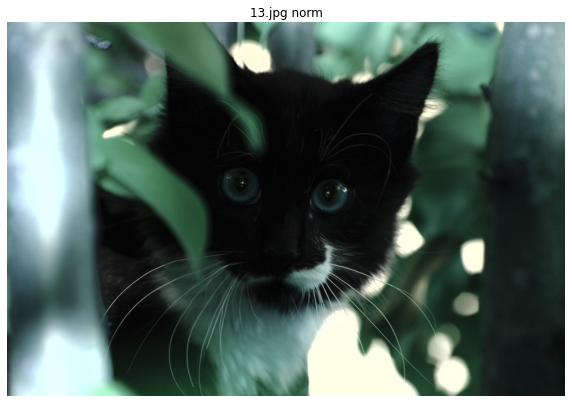

12.jpg


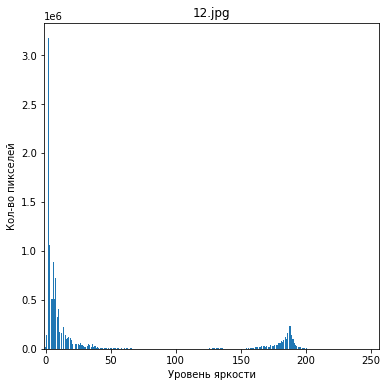

0-300


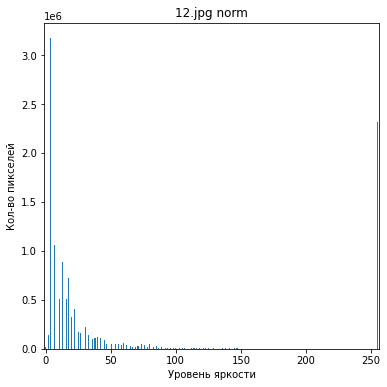

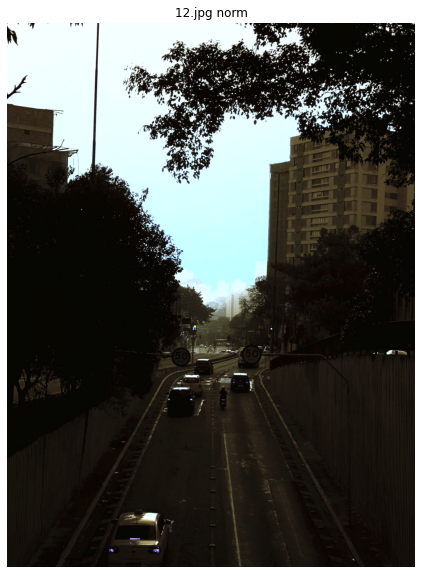

05.jpg


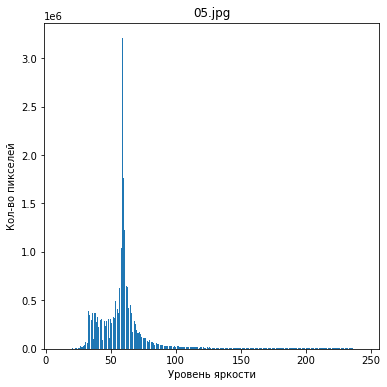

0-300


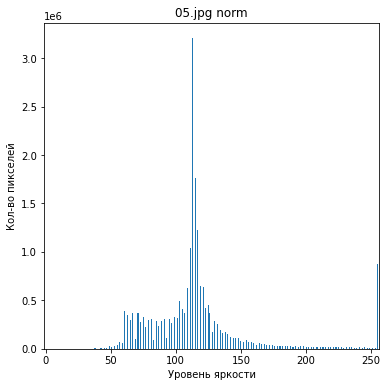

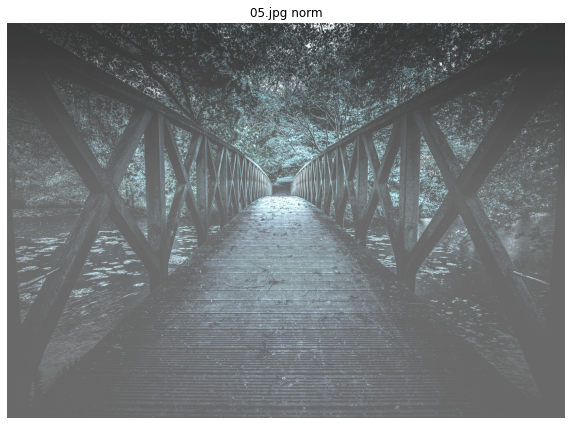

In [10]:
for path in os.listdir("pr5"):
    print(path)
    input = cv2.imread(os.path.join("pr5", path), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(input, cv2.COLOR_RGB2Lab)
    PrintHist(img, path)

    lightness=img[:,:,0]
    middle = int(np.median(cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)))
    if(middle in range(130,255)):
        lightness=cv2.normalize(lightness, None, -150, 255, norm_type=cv2.NORM_MINMAX)
        print("-100-255")
    elif(middle in range(100,130)):
        lightness=cv2.normalize(lightness, None, -50, 300, norm_type=cv2.NORM_MINMAX)
        print("-50-300")
    elif(middle in range(0,100)):
        lightness=cv2.normalize(lightness, None, 0, 500, norm_type=cv2.NORM_MINMAX)
        print("0-300")

    img_norm=img
    img_norm[:,:,0]=lightness
    PrintHist(img_norm, path+" norm")
    img_norm=cv2.cvtColor(img_norm, cv2.COLOR_Lab2RGB)
    ShowImage(img_norm, path+" norm")   

